Importo librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Pongo matplotlib interactivo para hacer zoom en los gráficos

In [3]:
%matplotlib widget

Cargo los datos tomados con axi y sampling rate 125 MHz

In [124]:
path = "/home/tomi/Documents/academicos/facultad/tesis/tesis/data/peak_width/axi/data.pickle"
d125 = pd.read_pickle(path)
d125.attrs["sampling_rate"] = 125e6

Cargo los datos tomados con acq y decimations de 1 a 4 (o sea, 2^1, 2^2 ... )

In [125]:
data = [d125]
for decimation in range(2, 6):
    path = f"/home/tomi/Documents/academicos/facultad/tesis/tesis/data/27-03/peak_width_decimation/{decimation}"
    df = pd.DataFrame()
    for filename in os.listdir(path):
        screen = pd.read_pickle(f"{path}/{filename}")
        df = pd.concat([df, screen], ignore_index=True)
        df.attrs = screen.attrs
    print(screen.attrs)
    data.append(df)

{'timestamp': '2023-10-01T07:06:40.096629+00:00', 'FPGA Unique DNA': 9768337293019220, 'FPGA Synthesized ID': 1, 'Library Version': '2.00-23 (43f2d6cd9)', 'decimation': 2, 'sampling_rate': 62500000.0, 'trace_duration': 0.000262144, 'trigger_delay': 0.00234, 'trigger_delay_samples': 146250.0, 'source': 'ch2', 'level': 1.0, 'positive_edge': False}
{'timestamp': '2023-10-01T07:06:51.269490+00:00', 'FPGA Unique DNA': 9768337293019220, 'FPGA Synthesized ID': 1, 'Library Version': '2.00-23 (43f2d6cd9)', 'decimation': 4, 'sampling_rate': 31250000.0, 'trace_duration': 0.000524288, 'trigger_delay': 0.00468, 'trigger_delay_samples': 146250.0, 'source': 'ch2', 'level': 1.0, 'positive_edge': False}
{'timestamp': '2023-10-01T07:07:04.096911+00:00', 'FPGA Unique DNA': 9768337293019220, 'FPGA Synthesized ID': 1, 'Library Version': '2.00-23 (43f2d6cd9)', 'decimation': 8, 'sampling_rate': 15625000.0, 'trace_duration': 0.001048576, 'trigger_delay': 0.00936, 'trigger_delay_samples': 146250.0, 'source': '

Para cada decimación grafico y busco los distintos tipos de picos para sacarle foto y pegarla más abajo

,time,ch1
0,0,3.515625
1,1,3.496094
2,2,3.525391
3,3,3.505859
4,4,3.498535
...,...,...
1048571,1048571,3.471680
1048572,1048572,3.491211
1048573,1048573,3.515625
1048574,1048574,3.496094


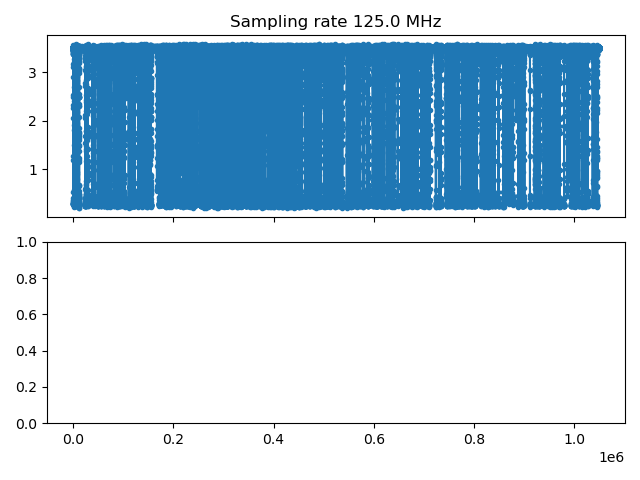

In [126]:
%matplotlib widget
plt.close('all')
d = data[0]
sr = d.attrs["sampling_rate"] * 1e-6
fig, axs = plt.subplots(2, 1, sharex=True)
ax1, ax2 = axs
ax1.set_title(f"Sampling rate {sr} MHz")
s0 = 10000
sf = 10000 + 2**14
#d_trunc = d.iloc[s0:sf, :]
#d_trunc = d.iloc[int(2.6e5):int(2.6e5) + 2**14, :]
d_trunc = d.iloc[:, :]
display(d)
ax1.plot(d_trunc.time, d_trunc["ch1"], '.-')
#ax1.plot(d_trunc["ch1"], '-')
kernel = [-1, 1]

#ax2.plot(d_trunc.time, np.convolve(d_trunc["ch1"], kernel, mode="same"), '.-')
plt.tight_layout()
plt.show()

# plot sig

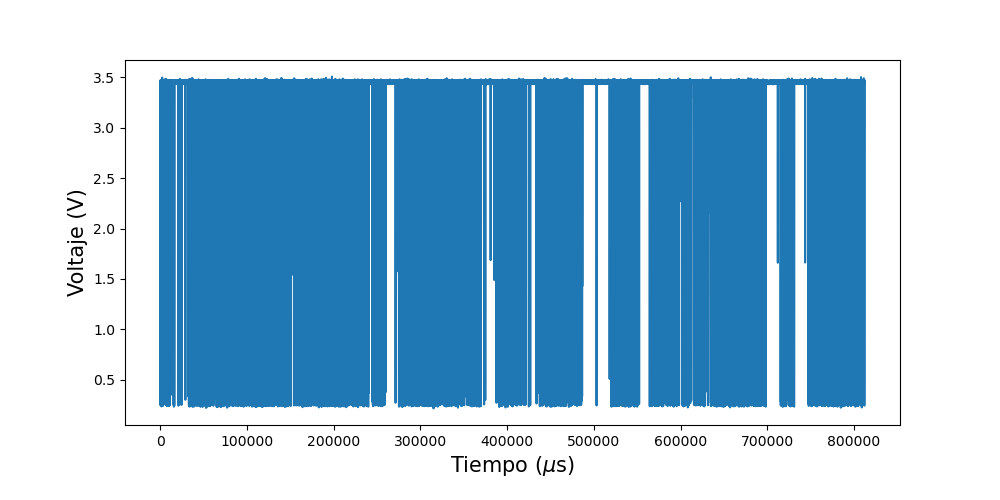

In [131]:
%matplotlib widget
plt.close('all')
#fig = plt.figure(figsize=(10,5), dpi=300)
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(bottom=0.15)
#df = data[2].iloc[:2**14, :]
df = data[2].iloc[:, :]
sr = 32.25 * 1e6
spls = 2**14
#df.loc[:, "time"] = np.arange(spls) / sr * 1e6
#display(df)
plt.plot(df.index, df.ch1)
plt.xlabel("Tiempo ($\mu$s)", fontsize=15)
plt.ylabel("Voltaje (V)", fontsize=15)
#plt.savefig('images/pmt_signal.png')
plt.show()

# Plot screens sig 32.25

50.0


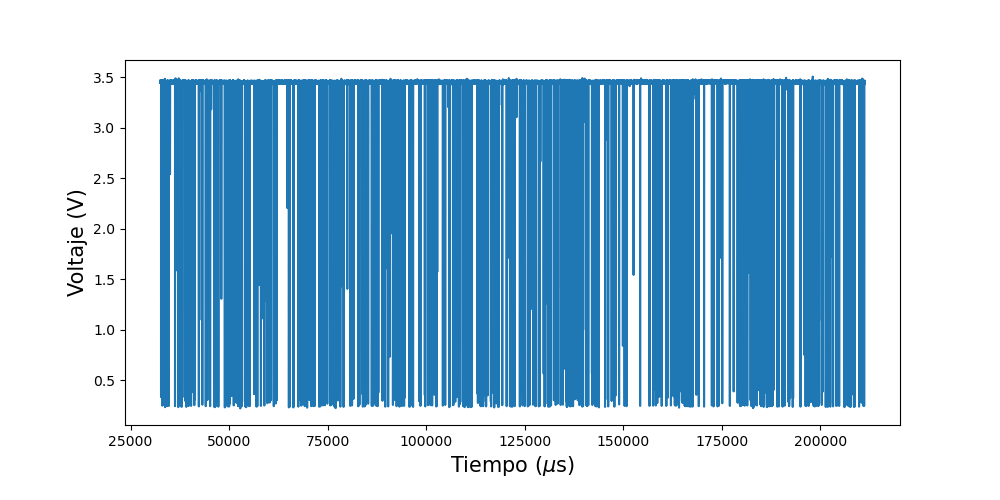

In [142]:

%matplotlib widget
plt.close('all')
#fig = plt.figure(figsize=(10,5), dpi=300)
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(bottom=0.15)
#df = data[2].iloc[:2**14, :]
df = data[2].iloc[:, :]
sr = 32.25 * 1e6
spls = 2**14
#df.loc[:, "time"] = np.arange(spls) / sr * 1e6
#display(df)
cond = True
i = 0
print(len(df)/16250)
#[16250 * i : 16251*(i+1)]

plt.plot(df.index[2*16250:13*16250], df.ch1[2*16250:13*16250])
#[plt.axvline(16250 * i, color="k", alpha=0.4) for i in range(50)]
plt.xlabel("Tiempo ($\mu$s)", fontsize=15)
plt.ylabel("Voltaje (V)", fontsize=15)
#plt.savefig('images/pmt_signal.png')
plt.show()

# Plots picos

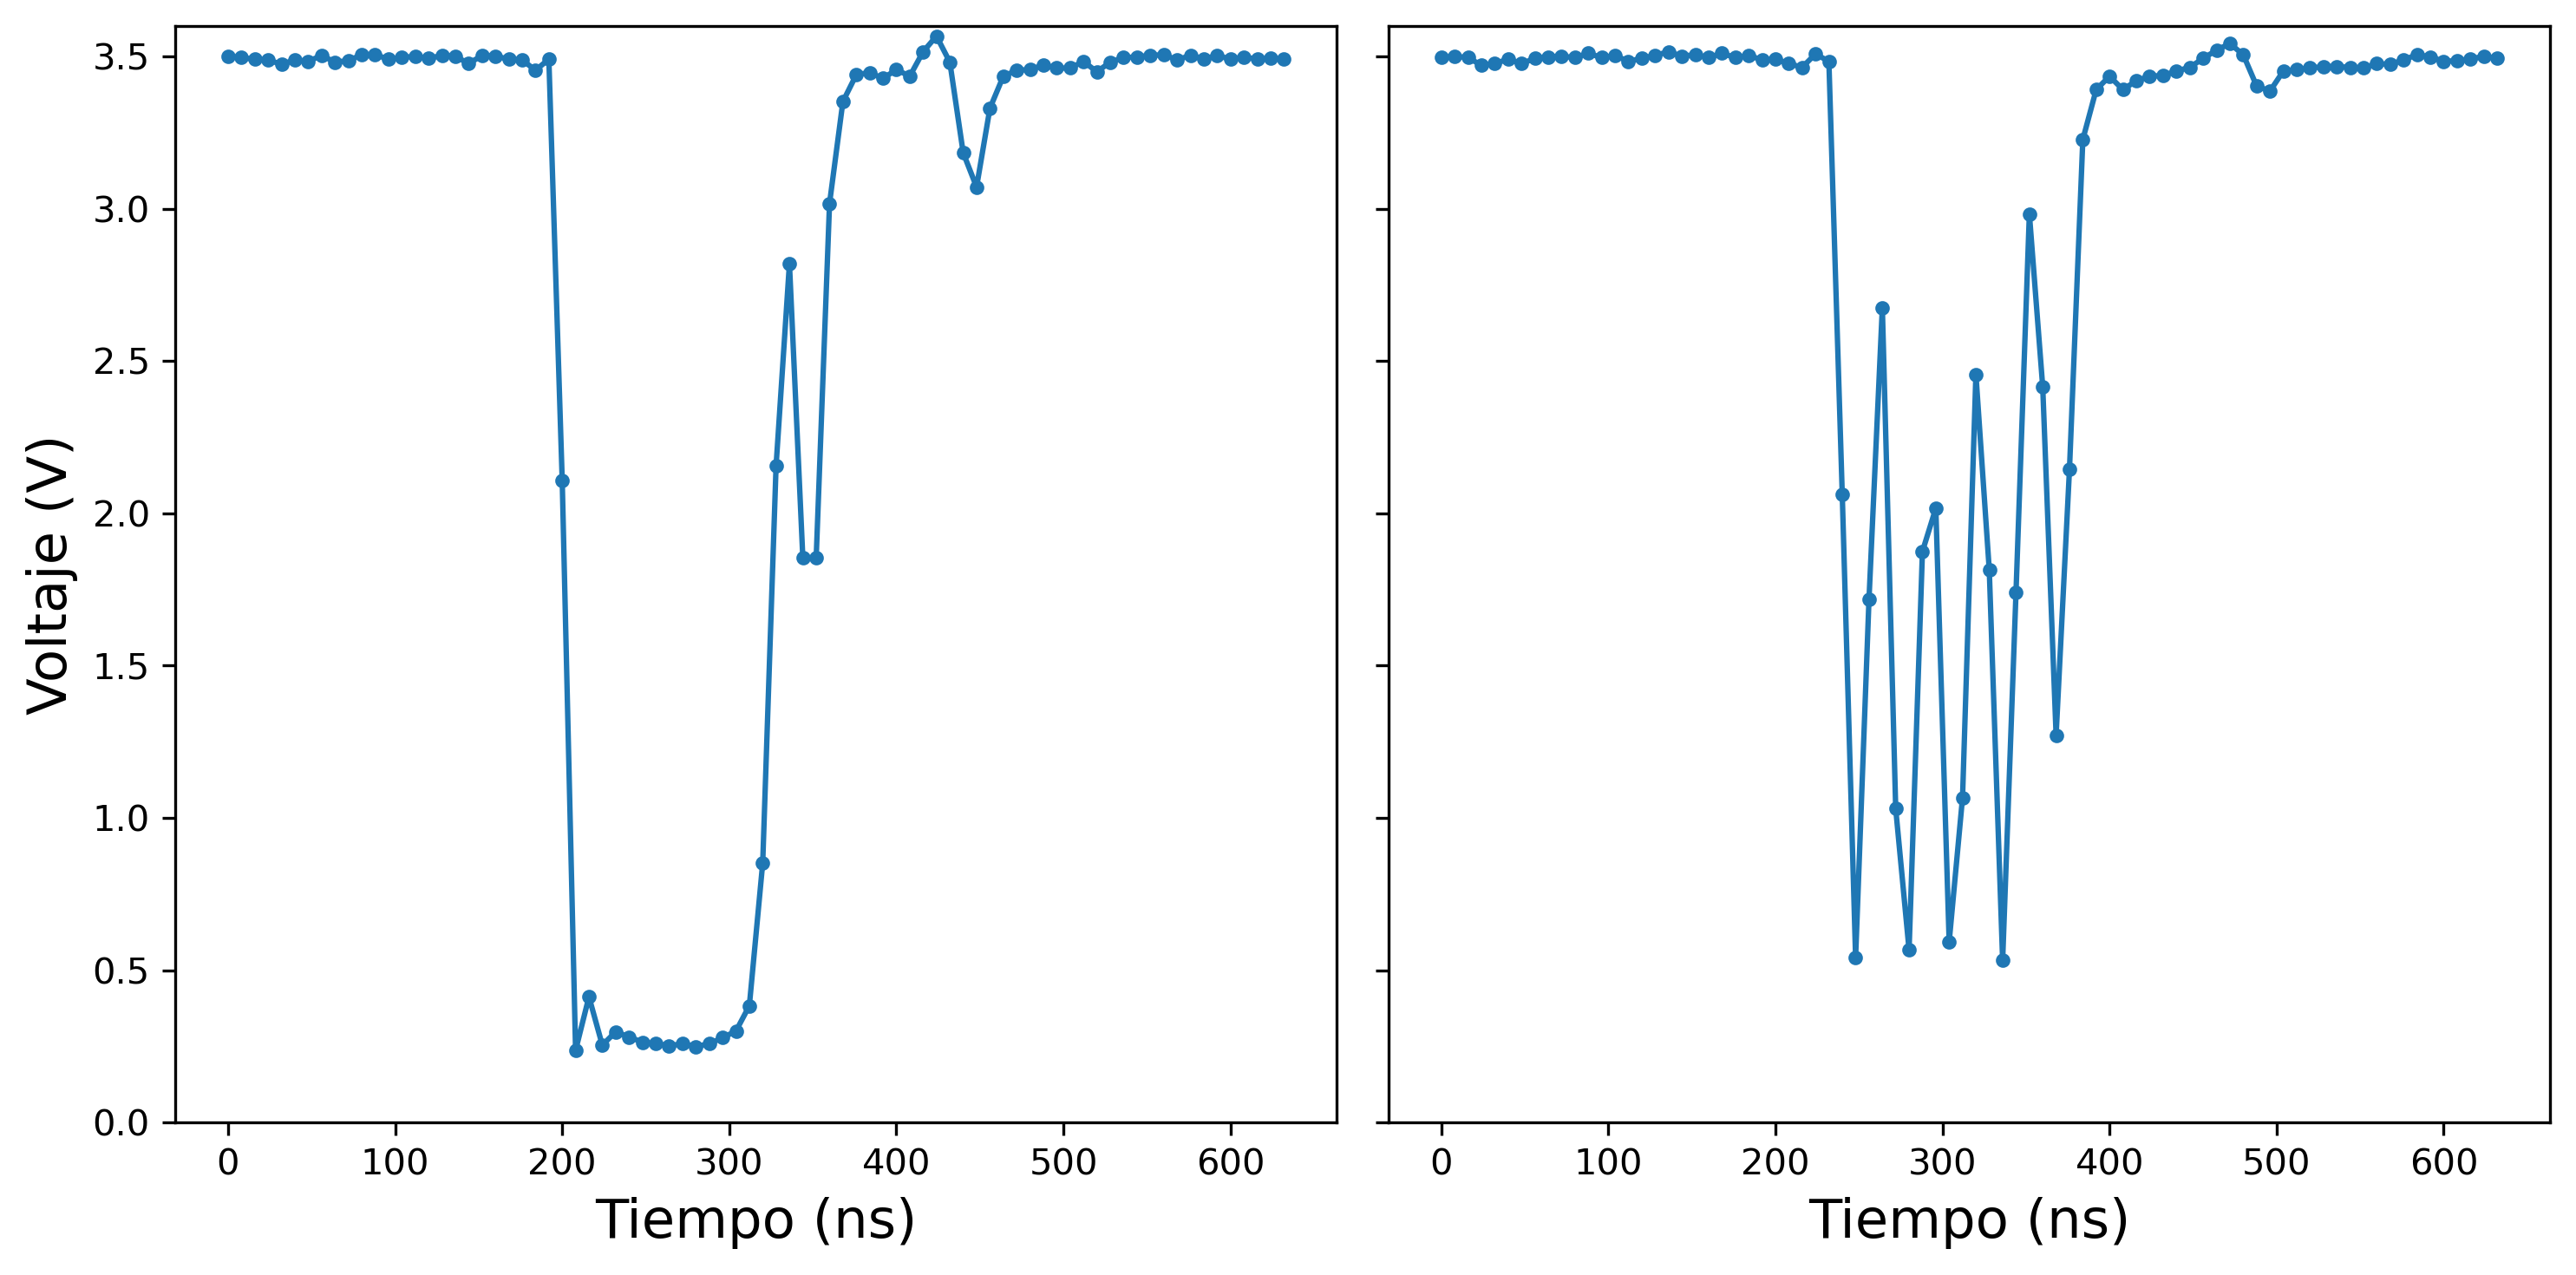

In [57]:
%matplotlib inline
plt.close('all')
df = data[0]#.iloc[:2**14, :]

fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True, dpi=300)
ax1, ax2 = axs

pi, pf = 3270, 3350
sr = 125e6
srns = sr / (1e9)

ax1.plot(df.time[pi:pf] / srns - pi/srns, df.ch1[pi:pf], '.-')

pi, pf = 409440, 409440 + 80

ax2.plot(df.time[pi:pf]/srns - pi/srns, df.ch1[pi:pf], '.-')

ax1.set_ylabel('Voltaje (V)', fontsize=15)
ax1.set_xlabel('Tiempo (ns)', fontsize=15)
ax2.set_xlabel('Tiempo (ns)', fontsize=15)
plt.tight_layout()

ax1.set_ylim([0, 3.6])
#plt.xticks(np.arange(0, 3.6, 0.5))
#plt.savefig('images/picos_unicos.png')
plt.show()

# Picos a ojo

Observando el gráfico a ojo veo que hay dos tipos principales de picos:

Estos son los mas frecuentes

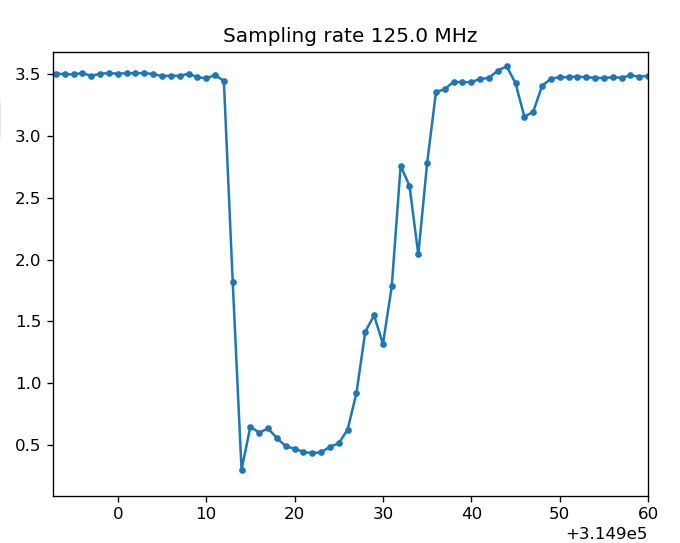

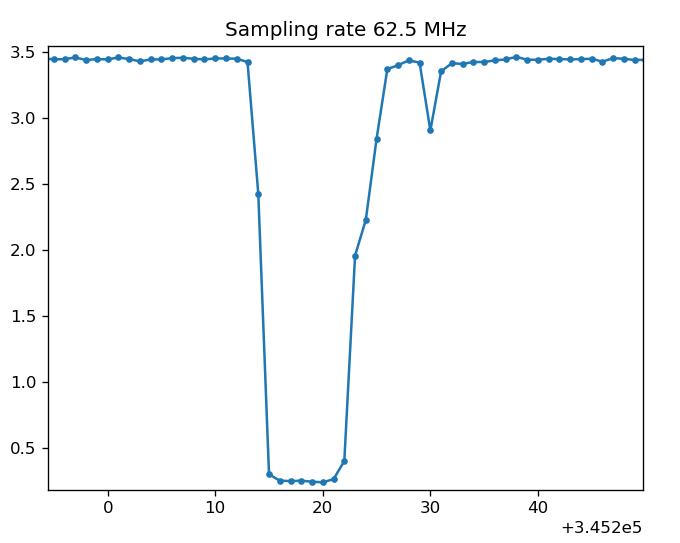

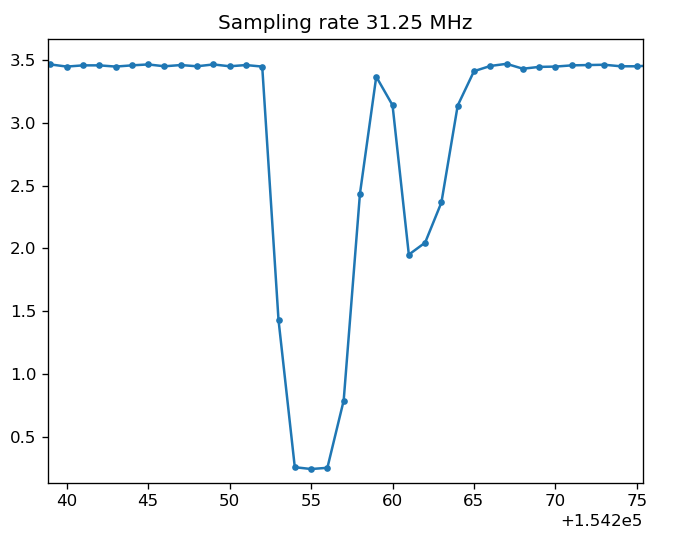

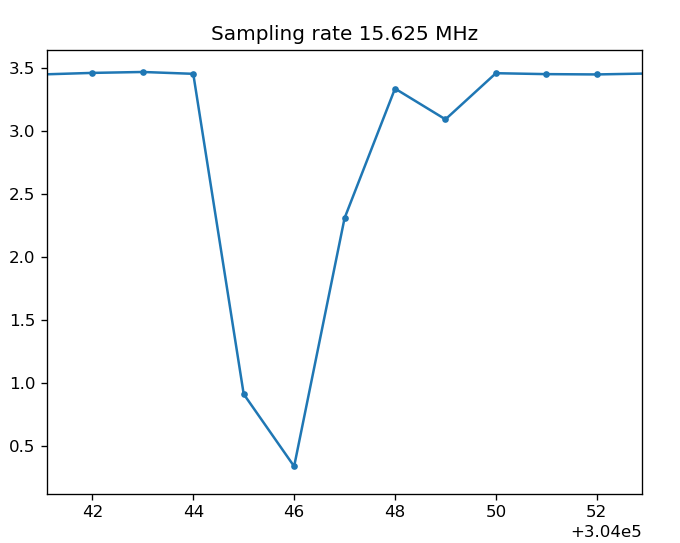

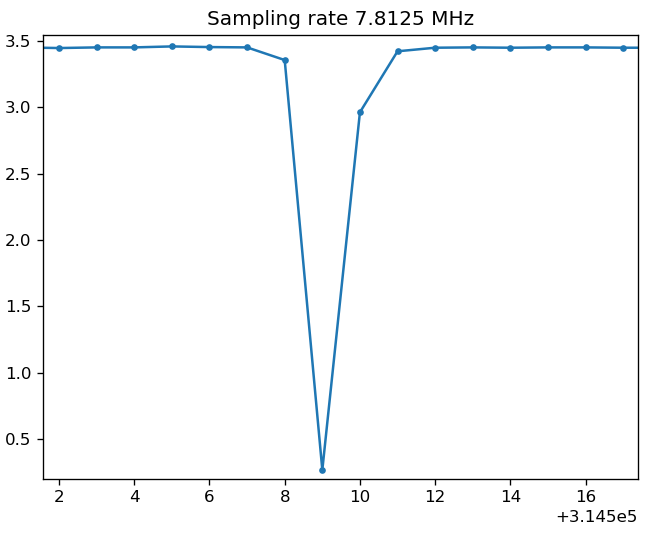

y estos menos frecuentes

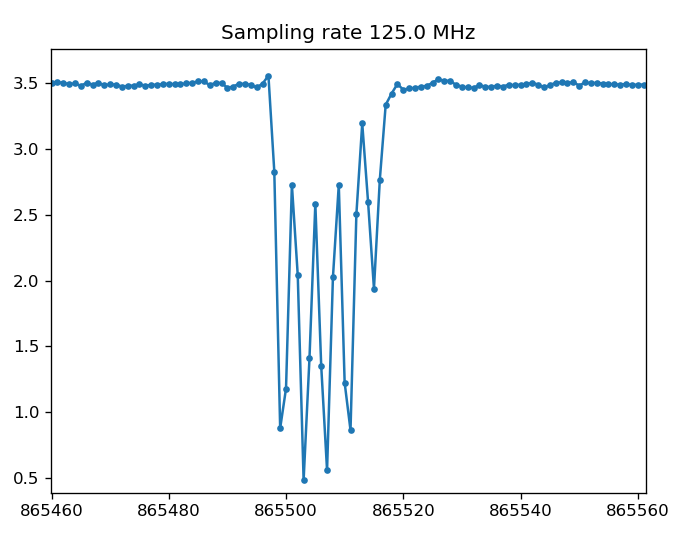

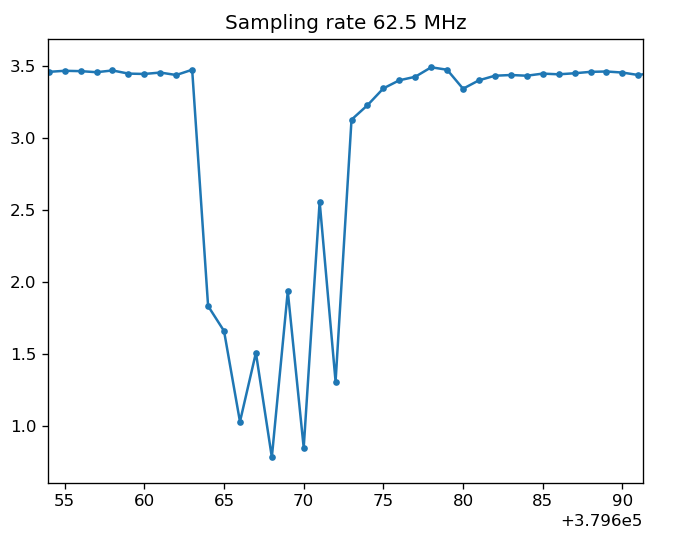

no pude encontrar picos menos frecuentes para sampling rates menores.
Se deben deformar mucho.
Sospecho que los primeros son los que estan bien y los segundos son algún tipo de ruido/artefacto del PMT.


1. distribución de alturas de los puntos de medición
1. distribución de alturas de la derivada
1. distribución de anchos en función de la altura
1. distribución de distancia hasta el próximo pico (derivada) en función de la altura

# Alturas puntos de medición


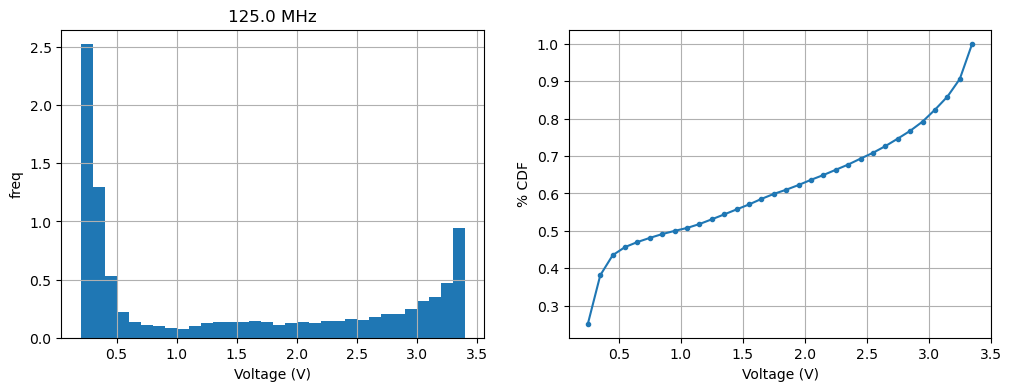

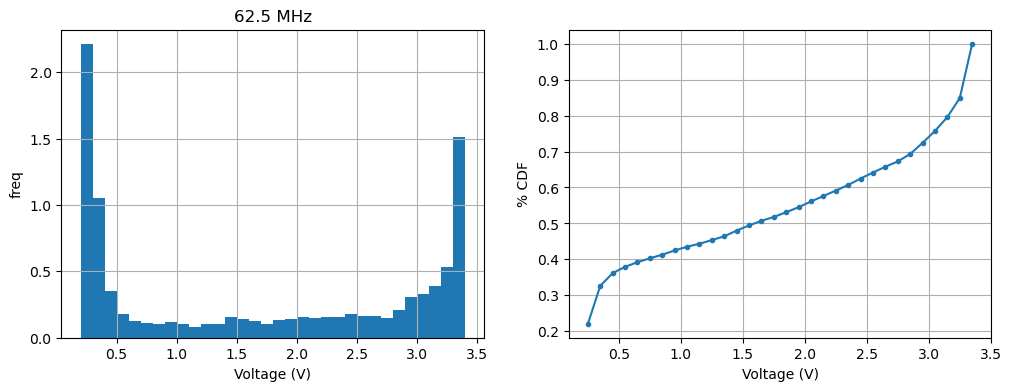

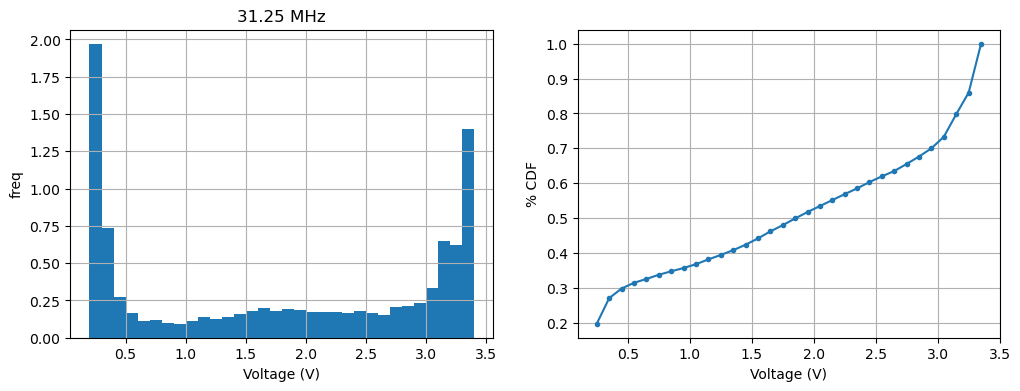

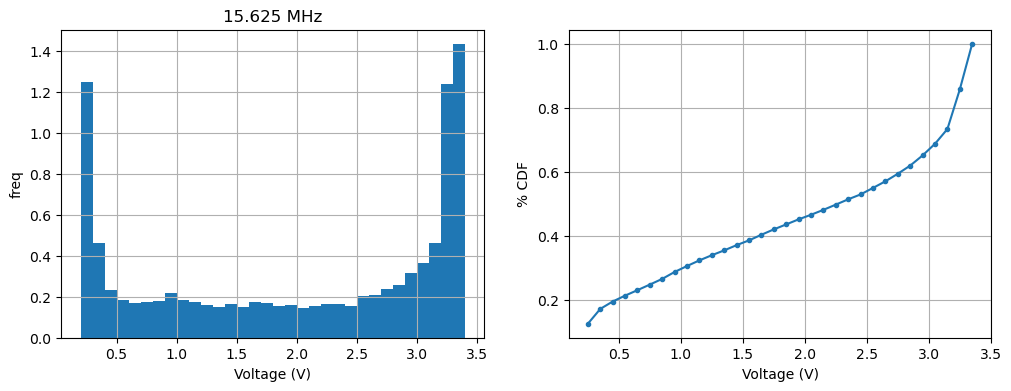

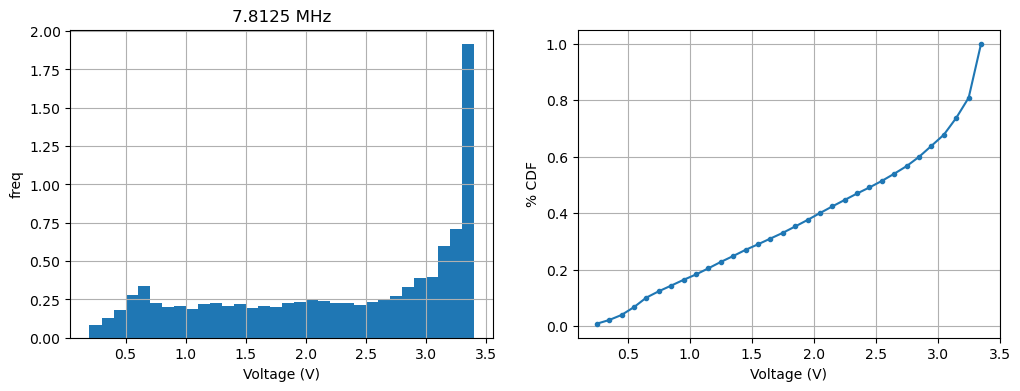

In [6]:
# Genero los bins
# defino voltage máximo
%matplotlib inline

max_voltage = 3.4
plt.close('all')
for df in data:
    df = df["ch1"][df["ch1"] < max_voltage]
    bins = np.arange(max_voltage, 0.1, -0.1)[::-1]

    freq, bin_edges = np.histogram(df, bins=bins, density=True)

    sr = df.attrs["sampling_rate"] * 1e-6
    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    ax0, ax1 = axs
    ax0.set_title(f"{sr} MHz")
    ax0.stairs(freq, bin_edges, fill=True)
    ax0.set_ylabel("freq")
    ax0.set_xlabel("Voltage (V)")
    bin_width = (bin_edges[1]-bin_edges[0])
    x = np.cumsum(np.diff(bin_edges)) + bin_edges[0] - bin_width/2
    ax1.plot(x, np.cumsum(freq)*bin_width, '.-')
    ax1.set_ylabel("% CDF")
    ax1.set_xlabel("Voltage (V)")
    ax1.grid()
    ax0.grid()
    plt.show()


# Grafico picos en func de decimation

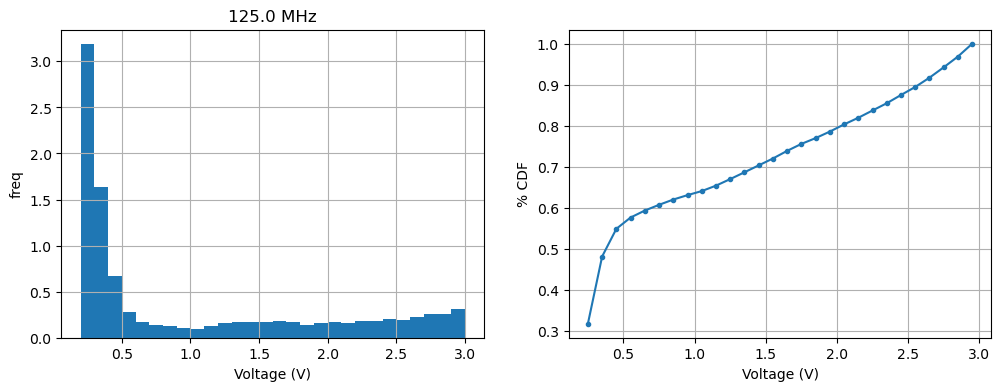

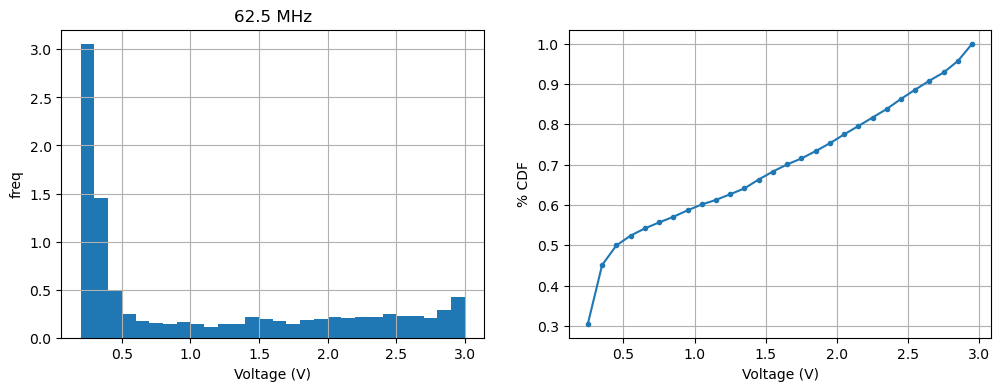

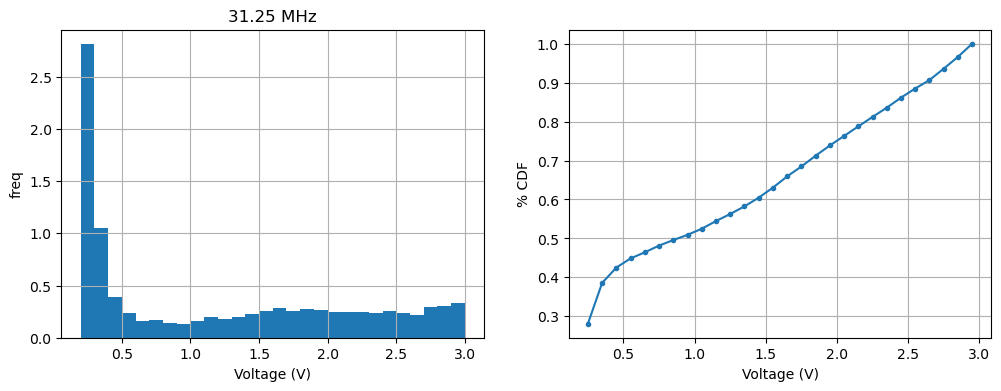

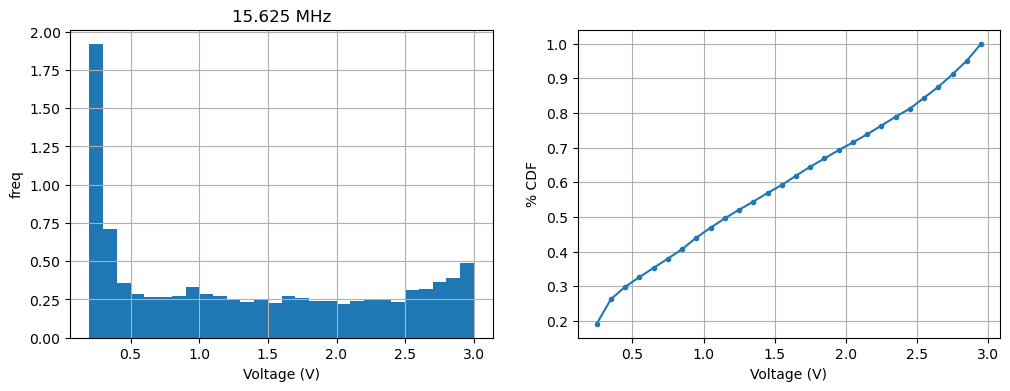

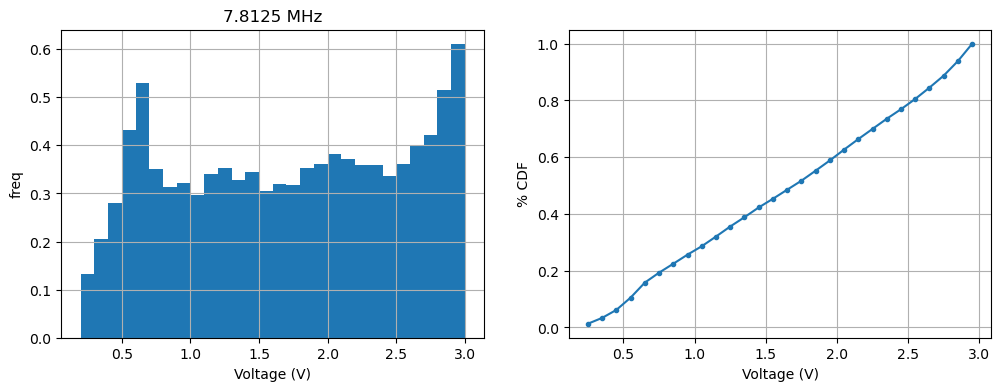

In [59]:

%matplotlib inline

max_voltage = 3.0
plt.close('all')
for df in data:
    df = df["ch1"][df["ch1"] < max_voltage]
    bins = np.arange(max_voltage, 0.1, -0.1)[::-1]

    freq, bin_edges = np.histogram(df, bins=bins, density=True)

    sr = df.attrs["sampling_rate"] * 1e-6
    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    ax0, ax1 = axs
    ax0.set_title(f"{sr} MHz")
    ax0.stairs(freq, bin_edges, fill=True)
    ax0.set_ylabel("freq")
    ax0.set_xlabel("Voltage (V)")
    bin_width = (bin_edges[1]-bin_edges[0])
    x = np.cumsum(np.diff(bin_edges)) + bin_edges[0] - bin_width/2
    ax1.plot(x, np.cumsum(freq)*bin_width, '.-')
    ax1.set_ylabel("% CDF")
    ax1.set_xlabel("Voltage (V)")
    ax1.grid()
    ax0.grid()
    plt.show()

Para las primeras 3 frecuencias (las que yo a ojo creo que son las mejores para detectar los picos) se ven picos para voltajes menores a 1.0 y entre 3.0 y 3.4.
Entre 1.0 y 3.0 la frecuencia es aproximadamente constante alrededor de 0.25.
Creo que lo importante para detectar los picos es que se vea el codo que se ve en los primeros 3 gráficos de la CDF.

# Distribución derivada

1048577


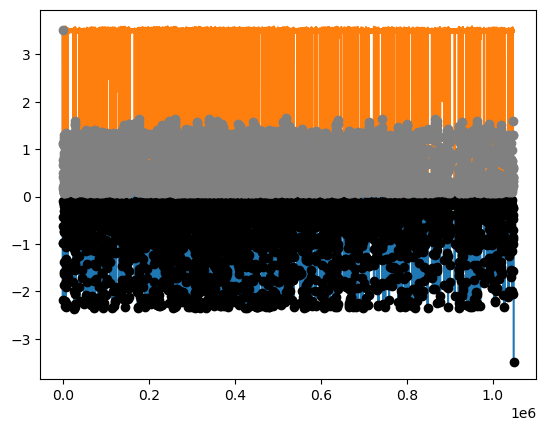

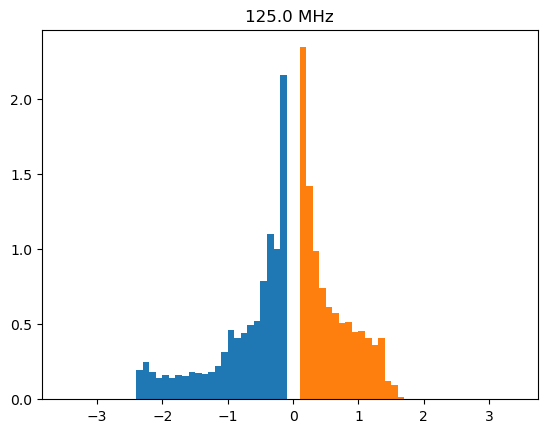

In [116]:

%matplotlib inline

max_voltage = 3.4
max_deriv_abs = .08
plt.close('all')
for i, df in enumerate(data):
    if i != 0:
        continue
    kernel = [1, -1]
    ddf = np.convolve(df["ch1"], kernel)
    filt_neg = ddf < -max_deriv_abs
    filt_pos = ddf > max_deriv_abs
    neg, pos = ddf[filt_neg], ddf[filt_pos]
    bneg = np.arange(-3.5, 0.0, 0.1)
    bpos = np.arange(0.1, 3.5, 0.1)
    plt.plot(ddf)
    plt.plot(df.ch1)
    print(len(ddf))
    plt.plot(np.arange(0, len(ddf))[filt_neg], ddf[filt_neg], 'o', color="black")
    plt.plot(np.arange(0, len(ddf))[filt_pos], ddf[filt_pos], 'o', color="gray")
    plt.show()

    fneg, beneg = np.histogram(neg, bins=bneg, density=True)
    fpos, bepos = np.histogram(pos, bins=bpos, density=True)

    sr = df.attrs["sampling_rate"] * 1e-6

    #plt.close('all')
    plt.title(f"{sr} MHz")
    plt.stairs(fneg, bneg, fill=True)
    plt.stairs(fpos, bpos, fill=True)
    plt.show()

Acá hay un par de cosas destacables. 
Primero, se ve un pico bastante marcado para la frecuencia de 62 MHz para voltajes menores a -2. 
También se ve un poco para 125 y 31, pero creo que en 62 se ve mejor porque no se samplean tantos puntos intermedios entre que arrancó a subir el pico y que está arriba como en 125 (por eso en 125 es mas chata la distribución).
Por otro lado, en 31 si bien se ve el pico en -3, parece opacado por una panza que aparece alrededor de -2.
Además de esa panza, en 31 aparece un pico en 1 V que no estaba antes en 62 ni 125.
Yo creo que esto tiene que ver (no se cómo) con la desaparición de las oscilaciones en la señal (los picos raros) que había mostrado antes.
A menores sampling rates el pico en -3 desaparece y el pico positivo en 1 empieza a correrse a la derecha.

# Anchos en función del voltaje

Defino función para medir ancho

In [209]:

def get_widths(signal, level):
    widths = []
    i = 0
    length = len(signal)
    while i < length-1:
        peak_width = 0
        dp = signal[i]
        while dp < level and i < length-1:
            peak_width += 1
            i += 1
            dp = signal[i]
        if peak_width > 0:
            widths.append(peak_width)
        i += 1
    return np.array(widths)

In [210]:
levels = np.linspace(0, 3.4, 10)
widths_total = []
for df in data:
    widths_df = []
    for level in levels:
        widths = get_widths(df["ch1"], level)
        widths_df.append(widths)
    widths_total.append(widths_df)

/usr/lib64/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


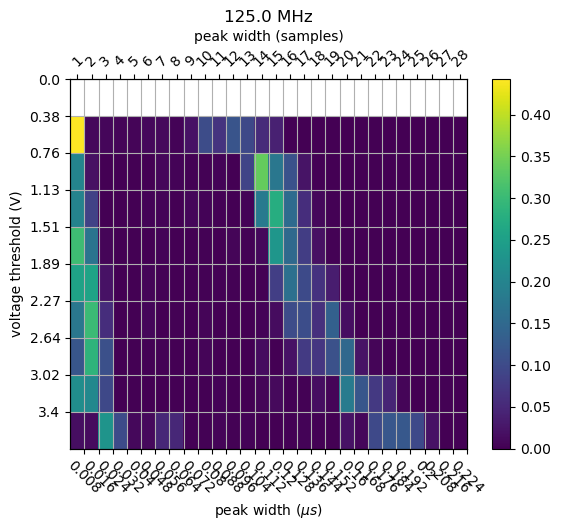

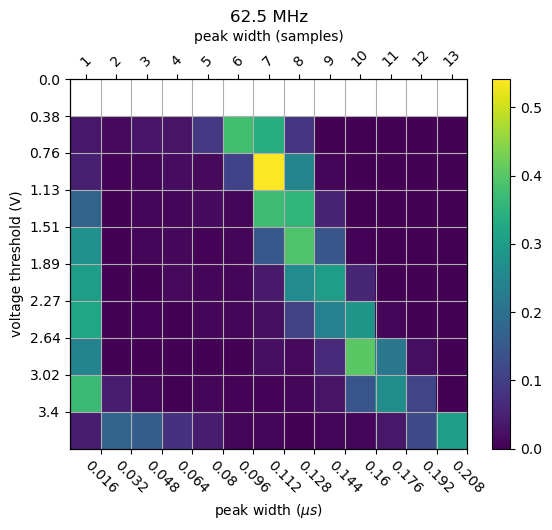

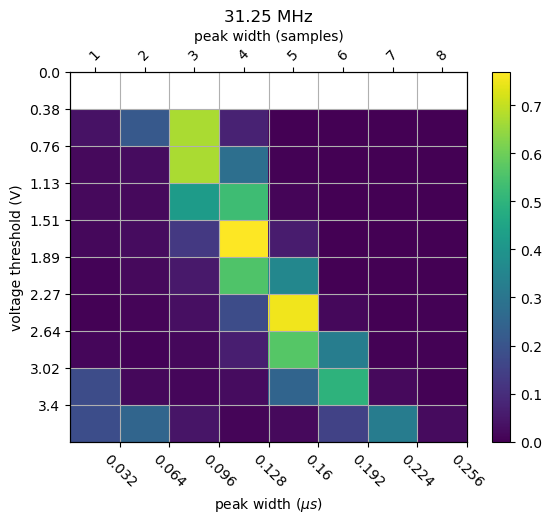

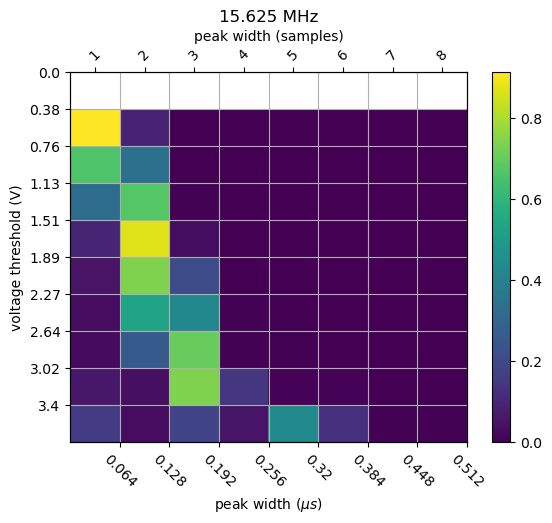

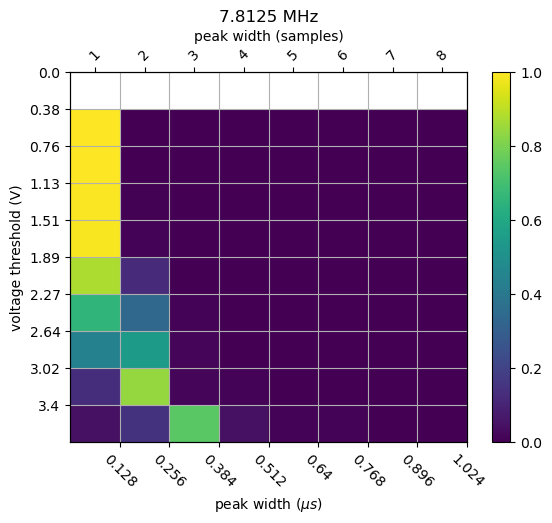

In [211]:

%matplotlib inline
import matplotlib.colors as colors

lvls = [round(lv, 2) for lv in levels]
plt.close('all')
max_bin = [30, 15, minx, maxx, 10]
srs = [df.attrs["sampling_rate"] for df in data]
for i, width_df in enumerate(widths_total):
    bins = np.arange(1, max_bin[i], 1)
    freqs = []
    for width_level in width_df:
        freq, bin_edges = np.histogram(width_level, bins=bins, density=True)
        freqs.append(freq)

    fig, ax1 = plt.subplots()
    im = ax1.imshow(freqs, aspect='auto')#, vmin=0, vmax=1)
    yticks = np.arange(len(freqs)) - 0.5
    ax1.set_yticks(ticks=yticks, labels=lvls)
    xticks = np.arange(len(freqs[0])) + 0.5
    xlbls = np.round(bin_edges[:-1] /srs[i] * 1e6, 3)
    ax1.set_xticks(ticks=xticks, labels=xlbls, rotation=-45)
    ax1.set_title(f"{srs[i] * 1e-6} MHz")
    ax1.set_xlabel("peak width ($\mu s$)")
    ax1.set_ylabel("voltage threshold (V)")

    ax2 = ax1.twiny()
    ax2.set_xticks(ax1.get_xticks() - 0.5)
    ax2.set_xticklabels(bin_edges[:-1], rotation=45)
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xlabel("peak width (samples)")

    ax1.grid()
    plt.colorbar(im)
    plt.show()



Con estos gráficos queda en evidencia que las únicas frecuencias razonables para medir son 125, 62 o 31. 
Para las frecuencias menores ya es muy probable tener picos de 1 sample, así que probablemente hay picos que se perdieron.

# Distribución de distancia derivada

Ahora defino una función para encontrar los picos de los fotones.
Lo que hago es calcular una convolución entre los datos y un kernel, de lo resultante obtener los índices en los que el valor es menor a un threshold, y por último eliminar los puntos pegados en los que se cumple la condición.
El kernel, el threshold y el sampling rate de los datos que le pase a esta función va a definir una forma de contar fotones.
Debería encontrar la "mejor forma" de contar los fotones.
Para esto se me ocurren dos cosas que toman como **hipótesis que la probabilidad de contar un fotón en un intervalo de tiempo a una intensidad y con este PMT es poisson**.
En ese caso, podría determinar el mejor criterio para contar fotones barriendo todos los criterios y encontrar el que mejor ajuste:
1. Los datos subsampleados en distintos intervalos por una poisson proporcional al intervalo.
1. La distancia entre fotones por una exponencial. 

**No confío del todo en las mediciones que tengo para hacer esto. Podría repetirlas teniendo este objetivo en cuenta.**

In [349]:
def find_edges(data, threshold, kernel=(1,-1), clean=True):
    dd = np.convolve(data, kernel)
    edges = np.where(dd < threshold)[0]

    if clean:
        e_prev=0
        for i, e in enumerate(edges):
            if e-e_prev < 2:
                edges[i] = -1
            e_prev = e
        edges = edges[edges >= 0]
    return edges

In [ ]:
plt.close('all')
d = data[1]
is_poisson = []
mes_interval = 10000
for i in range(10000):
    i0 = np.random.randint(0, len(d) - mes_interval)
    edges = find_edges(d.iloc[i0: i0+mes_interval]["ch1"], -1, kernel=(1, -1))
    is_poisson.append(len(edges))

bins = np.arange(0, 40)
freq, bin_edges = np.histogram(is_poisson, bins=bins)
plt.stairs(freq, bin_edges, fill=True)
plt.xticks(bins[::2])
plt.show()

Jugando un poco con los valores de la celda de arriba, se ve que el comportamiento promedio parece poisson, pero hay algunos artefactos extraños que tengo que explorar.

# Auto corr

{'timestamp': '2023-10-01T07:06:40.096629+00:00', 'FPGA Unique DNA': 9768337293019220, 'FPGA Synthesized ID': 1, 'Library Version': '2.00-23 (43f2d6cd9)', 'decimation': 2, 'sampling_rate': 62500000.0, 'trace_duration': 0.000262144, 'trigger_delay': 0.00234, 'trigger_delay_samples': 146250.0, 'source': 'ch2', 'level': 1.0, 'positive_edge': False}
[ 1.1920929e-05 -1.7881393e-05 -3.5762787e-05 ... -3.5762787e-05
 -1.7881393e-05  1.1920929e-05]


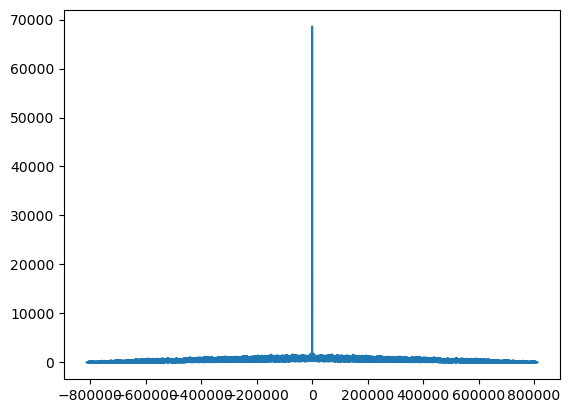

{'timestamp': '2023-10-01T07:06:51.269490+00:00', 'FPGA Unique DNA': 9768337293019220, 'FPGA Synthesized ID': 1, 'Library Version': '2.00-23 (43f2d6cd9)', 'decimation': 4, 'sampling_rate': 31250000.0, 'trace_duration': 0.000524288, 'trigger_delay': 0.00468, 'trigger_delay_samples': 146250.0, 'source': 'ch2', 'level': 1.0, 'positive_edge': False}
[-5.9604645e-06  3.5762787e-05 -2.3841858e-05 ... -2.3841858e-05
  3.5762787e-05 -5.9604645e-06]


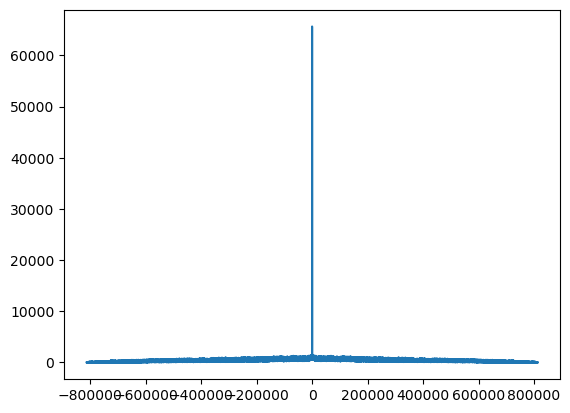

{'timestamp': '2023-10-01T07:07:04.096911+00:00', 'FPGA Unique DNA': 9768337293019220, 'FPGA Synthesized ID': 1, 'Library Version': '2.00-23 (43f2d6cd9)', 'decimation': 8, 'sampling_rate': 15625000.0, 'trace_duration': 0.001048576, 'trigger_delay': 0.00936, 'trigger_delay_samples': 146250.0, 'source': 'ch2', 'level': 1.0, 'positive_edge': False}
[0. 0. 0. ... 0. 0. 0.]


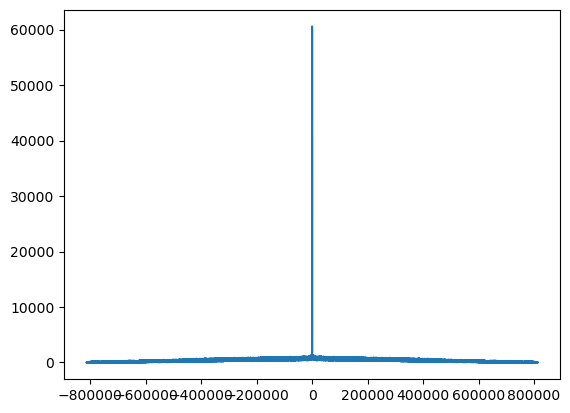

{'timestamp': '2023-10-01T07:07:18.290037+00:00', 'FPGA Unique DNA': 9768337293019220, 'FPGA Synthesized ID': 1, 'Library Version': '2.00-23 (43f2d6cd9)', 'decimation': 16, 'sampling_rate': 7812500.0, 'trace_duration': 0.002097152, 'trigger_delay': 0.01872, 'trigger_delay_samples': 146250.0, 'source': 'ch2', 'level': 1.0, 'positive_edge': False}
[ 0.0000000e+00  5.9604645e-06 -1.1920929e-05 ... -1.1920929e-05
  5.9604645e-06  0.0000000e+00]


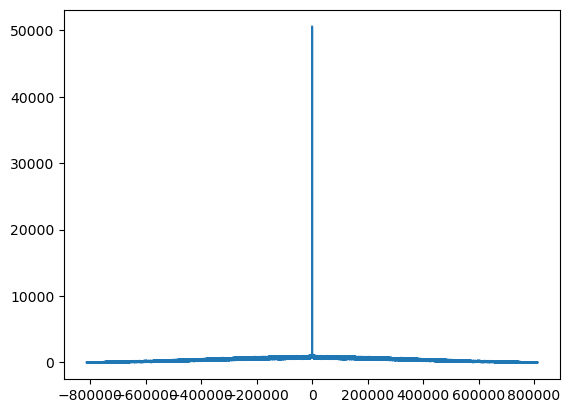

In [60]:
%matplotlib inline

data = [d125]
autocorrs = []
autocorrs_screens = []
for decimation in range(2, 6):
    path = f"/home/tomi/Documents/academicos/facultad/tesis/tesis/data/27-03/peak_width_decimation/{decimation}"
    df = pd.DataFrame()
    autocorr_screens = []
    for filename in os.listdir(path):
        screen = pd.read_pickle(f"{path}/{filename}")
        df = pd.concat([df, screen], ignore_index=True)
        df.attrs = screen.attrs
        sig = screen.ch1 - np.median(screen.ch1)
        autocorr_screen = np.correlate(sig, sig, mode="full")
        autocorr_screens.append(autocorr_screen)
    print(screen.attrs)
    autocorr = np.correlate(df.ch1 - np.median(df.ch1), df.ch1 - np.median(df.ch1), mode="full")
    print(autocorr)
    autocorrs.append(autocorr)
    autocorrs_screens.append(autocorr_screens)
    lags = np.arange(-len(df.ch1) + 1, len(df.ch1), 1)
    plt.plot(lags, autocorr)
    plt.show()
    data.append(df)

In [61]:
# Guardo los datos de correlaciones en /home/tomi/Documents/academicos/facultad/tesis/tesis/data/27-03/peak_width_decimation/correlations/{i+2}
print(type(autocorrs_screens[0][0]))
for i in range(len(autocorrs_screens)):
    p =f'/home/tomi/Documents/academicos/facultad/tesis/tesis/data/27-03/peak_width_decimation/correlations/{i+2}'
    for j in range(len(autocorrs_screens[0])):
        np.save(f"{p}/{str(j).zfill(2)}.npy", autocorrs_screens[i][j])

<class 'numpy.ndarray'>


In [62]:
df32 = data[1]
autocorr32 = autocorrs[1]
autocorr32 = autocorr32 / (len(df32.ch1) * np.var(df32.ch1))

In [63]:
screen_size = 2**14
autocorr_screens32 = autocorrs_screens[1]

In [64]:
print(autocorr_screens32)

[array([0.00015497, 0.00013113, 0.00204444, ..., 0.00204444, 0.00013113,
       0.00015497], dtype=float32), array([-1.7881393e-05,  9.5367432e-05,  8.3446503e-05, ...,
        8.3446503e-05,  9.5367432e-05, -1.7881393e-05], dtype=float32), array([ 0.0000000e+00, -3.5762787e-05,  2.3841858e-05, ...,
        2.3841858e-05, -3.5762787e-05,  0.0000000e+00], dtype=float32), array([-1.1920929e-05,  5.9604645e-06,  5.3644180e-05, ...,
        5.3644180e-05,  5.9604645e-06, -1.1920929e-05], dtype=float32), array([0.0000000e+00, 2.3841858e-05, 1.1920929e-05, ..., 1.1920929e-05,
       2.3841858e-05, 0.0000000e+00], dtype=float32), array([ 0.0000000e+00, -4.7683716e-05, -1.1920929e-05, ...,
       -1.1920929e-05, -4.7683716e-05,  0.0000000e+00], dtype=float32), array([-1.7881393e-05, -4.7683716e-05,  1.1920929e-05, ...,
        1.1920929e-05, -4.7683716e-05, -1.7881393e-05], dtype=float32), array([-5.9604645e-06,  2.3841858e-05,  1.1920929e-05, ...,
        1.1920929e-05,  2.3841858e-05, -5.960

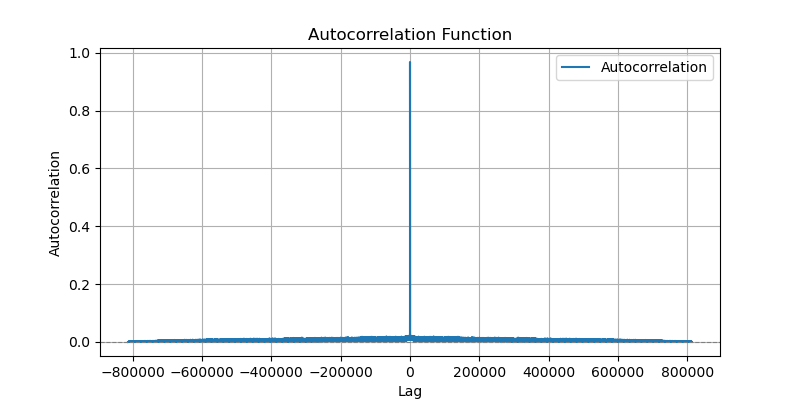

No such comm: 83d255fadfec4913a8e8034d2a6fe415


In [65]:
%matplotlib widget

plt.close('all')
plt.figure(figsize=(8, 4))
plt.plot(lags, autocorr32, label='Autocorrelation')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Add a reference line at 0
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.legend()
plt.grid()
plt.show()

/tmp/ipykernel_28227/2859259410.py:28: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gaussian, lags_fit, atcrr_fit, p0=[1, 0, 4])


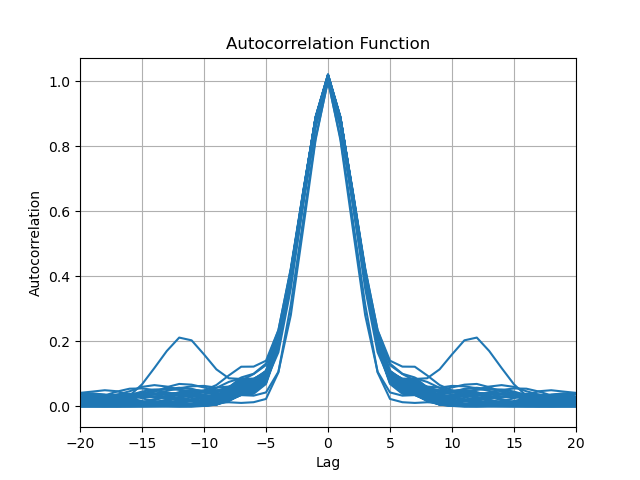

In [66]:
import scipy.stats as ss
from scipy.optimize import curve_fit
%matplotlib widget

def gaussian(x, a=1, mu=0, sigma=4):
    return a*ss.norm.pdf(x, loc=mu, scale=sigma)

plt.close('all')
#fig, ax = plt.subplots()
# grafico las correlaciones y agarro fwhm promedio y desviacion para 32.25Mhz
path = '/home/tomi/Documents/academicos/facultad/tesis/tesis/data/27-03/peak_width_decimation/3'

fwhms = []

for i, atcrr, filename in zip(range(len(autocorrs_screens[1])), autocorrs_screens[1], os.listdir(path)):
    #print(f"{path}/{filename}")
    screen = pd.read_pickle(f"{path}/{filename}")
    dtpts = len(screen.ch1)
    lags = np.arange(-dtpts + 1, dtpts, 1)
    atcrr = atcrr / (len(screen.ch1) * np.var(screen.ch1))
    plt.plot(lags, atcrr, color='C0')
    plt.xlim([-20, 20])


    fit_indexes = np.where(np.logical_and(lags > -6, lags < 6))[0]
    lags_fit = lags[fit_indexes]
    atcrr_fit = atcrr[fit_indexes]
    popt, pcov = curve_fit(gaussian, lags_fit, atcrr_fit, p0=[1, 0, 4])

    x = np.linspace(-5, 5, 1000)
    a, mu, sigma = popt
    fwhm = 2 * np.sqrt(2 * np.log(2)) * sigma 
    fwhms.append(fwhm)


plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.grid()
plt.show()

In [ ]:

plt.close('all')
plt.hist(fwhms)
print(np.mean(fwhms)*32.25, np.std(fwhms)*32.25)
plt.show()

# Simulo cuadrados y calculo autocorr

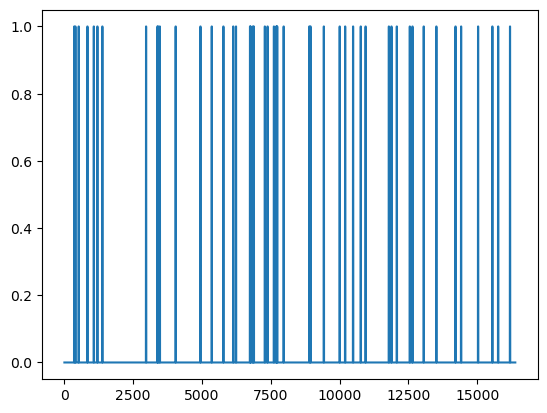

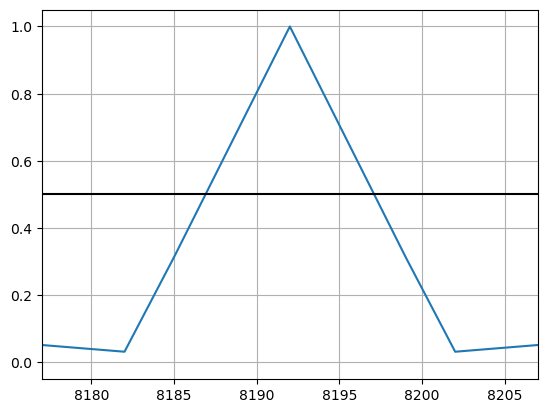

In [86]:
%matplotlib inline
plt.close('all')

def get_width(min, max):
    return np.random.randint(min, max + 1)

length = 2**14
width = 5
min_width = 10
max_width = 10
samples = np.arange(0, 2**14, 1)

# Define the parameters
start = length//2 - width//2       # Starting position of the pulse (0-indexed)

# Create the vector
vector = np.zeros(length)
for start, width in zip(np.random.randint(0, 2**14+1, size=50), np.random.randint(min_width, max_width+1, size=50)):
    vector[start:start+width] = 1 

samples_side = 10

corr = np.correlate(vector, vector, mode="same")

#plt.xlim([length//2 - width//2 - samples_side, length//2 + width//2 + samples_side])
plt.plot(samples, vector)
plt.show()

plt.plot(samples, corr/max(corr))
plt.xlim([length//2 - width//2 - samples_side, length//2 + width//2 + samples_side])
plt.axhline(0.5, xmin=-10, xmax=10, color="k")
plt.grid()
plt.show()


0.001350472081842122 0.0008652199118317789
0.9999927435914566 0.7071016501308593


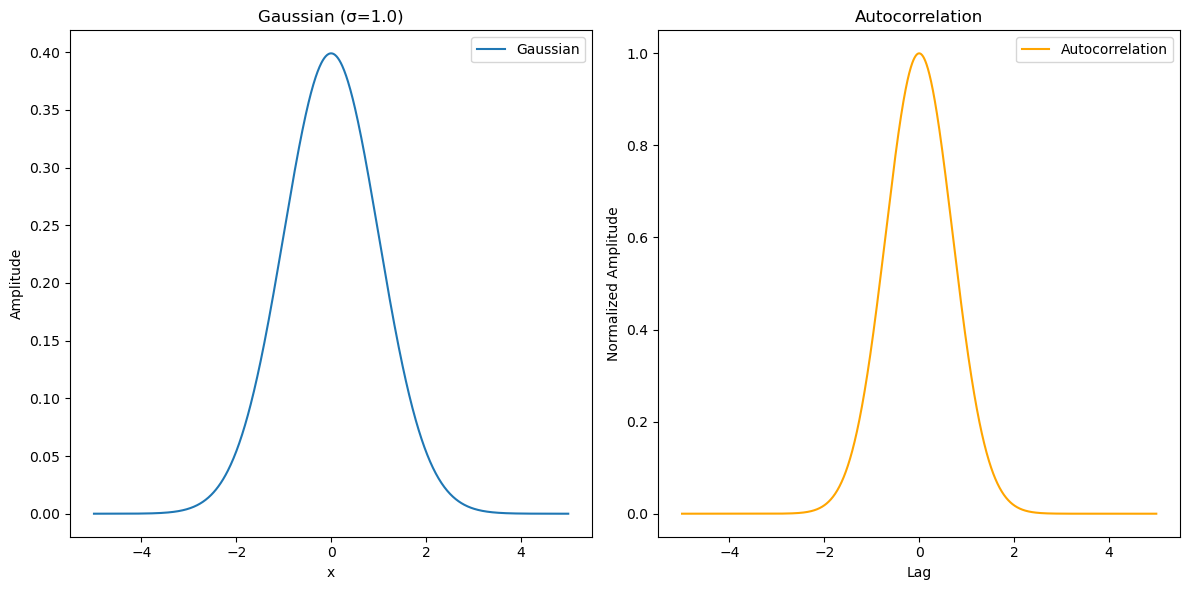

(np.float64(0.9999927435914566), np.float64(0.7071016501308593))

In [185]:
import numpy as np
import matplotlib.pyplot as plt

# Define a Gaussian function
def gaussian(x, sigma):
    return np.exp(-x**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

# Parameters for the Gaussian
sigma = 1.0
x = np.linspace(-5 * sigma, 5 * sigma, 1000)
gaussian_signal = gaussian(x, sigma)

# Compute the autocorrelation of the Gaussian
autocorrelation = np.correlate(gaussian_signal, gaussian_signal, mode='full')
autocorrelation /= autocorrelation.max()  # Normalize
lag = np.linspace(-5 * sigma, 5 * sigma, len(autocorrelation))

# Calculate the standard deviations
std_gaussian = np.sqrt(np.sum((x**2) * gaussian_signal) / np.sum(gaussian_signal))
std_autocorrelation = np.sqrt(np.sum((lag**2) * autocorrelation) / np.sum(autocorrelation))
print(np.std(gaussian_signal)/np.sum(gaussian_signal), np.std(autocorrelation)/np.sum(autocorrelation))
print(std_gaussian, std_autocorrelation)

# Plot the Gaussian and its autocorrelation
plt.figure(figsize=(12, 6))

# Gaussian
plt.subplot(1, 2, 1)
plt.plot(x, gaussian_signal, label="Gaussian")
plt.title(f"Gaussian (σ={sigma})")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.legend()

# Autocorrelation
plt.subplot(1, 2, 2)
plt.plot(lag, autocorrelation, label="Autocorrelation", color='orange')
plt.title(f"Autocorrelation")
plt.xlabel("Lag")
plt.ylabel("Normalized Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

std_gaussian, std_autocorrelation


0.46012224291856263
0.27001681682309187
1.224744871391589 0.8164965809277261


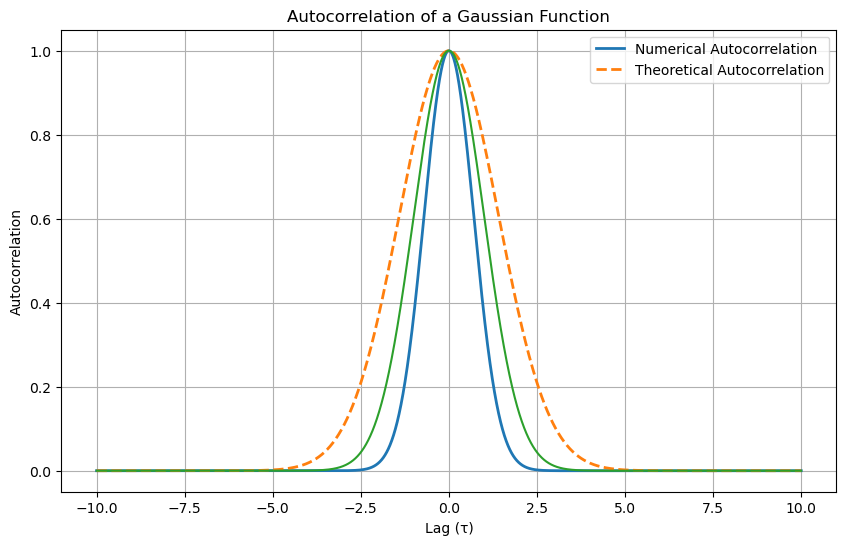

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.stats import norm

# Parameters
sigma = 1.0

x = np.linspace(-10, 10, 10000)

# Gaussian function
gaussian = norm.pdf(x, loc=0, scale=sigma)

# Numerical autocorrelation
autocorr = correlate(gaussian, gaussian, mode='full')  # Full autocorrelation
lags = np.linspace(-10, 10, len(autocorr))  # Lags for plotting

# Normalize autocorrelation
autocorr /= autocorr.max()

# Theoretical autocorrelation
tau = np.linspace(-10, 10, 1000)
theoretical_autocorr = np.exp(-1*tau**2 / (4 * (sigma**2)))

print(np.std(gaussian)/ np.std(autocorr))
print(np.std(gaussian/gaussian.max()))
print(np.sqrt(3/2), 1/np.sqrt(3/2))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lags, autocorr, label="Numerical Autocorrelation", lw=2)
plt.plot(tau, theoretical_autocorr, '--', label="Theoretical Autocorrelation", lw=2)
plt.plot(x, gaussian/gaussian.max())
plt.title("Autocorrelation of a Gaussian Function")
plt.xlabel("Lag (τ)")
plt.ylabel("Autocorrelation")
plt.legend()
plt.grid()
plt.show()
